Data

In [1]:
import numpy as np
x = [ 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5., 5.5, 6., 6.5, 7., 7.5, 8., 8.5, 9., 9.5, 10. ]
y = [3.43, 4.94, 6.45, 9.22, 6.32, 6.11, 4.63, 8.95, 7.8, 8.35, 11.45, 14.71, 11.97, 12.46, 17.42, 17.0, 15.45, 19.15, 20.86]
x=np.asarray(x)
y=np.asarray(y)

Fit a linear curve to the data

In [2]:
from scipy.stats import linregress
slope,intercept,rvalue,pvalue,stderr=linregress(x,y)

Fit a cubic curve using the SciPy library 

In [3]:
coeff = np.polyfit(x, y, 3)
coeff

array([ -4.77843450e-04,   1.49438302e-01,   1.54461198e-01,
         4.52517028e+00])

Find the area underneath the cubic curve over the domain of the data using the tools in SciPy

In [4]:
import scipy.integrate
f = lambda x:coeff[0]*x**3+coeff[1]*x**2+coeff[2]*x+coeff[3]
area = scipy.integrate.quad(f, x[0], x[len(x)-1])

Plot the data, the linear fit, and the cubic fit in Matplotlib.  Make sure
to give the plot a title and an x and y label. 

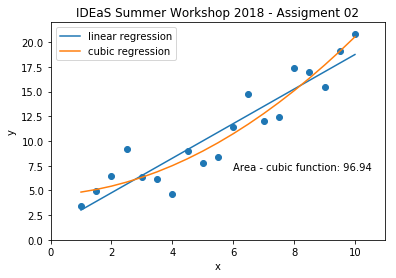

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y)
plt.plot(x,slope*x+intercept,
        x,coeff[0]*x**3+coeff[1]*x**2+coeff[2]*x+coeff[3])
plt.axis([0,11,0,22])
plt.legend(['linear regression','cubic regression'])
plt.title("IDEaS Summer Workshop 2018 - Assigment 02")
plt.xlabel("x")
plt.ylabel("y")
plt.text(6,7,'Area - cubic function: %.2f' % area[0] )
plt.savefig('dvaca_01.png', blox_inches='tight',dpi=200)
plt.show()

Use the Bayesian information criterion to justify which model (linear or cubic) is preferable.  Include this justification in your journal entry for the week.

In [14]:

def BIC(y, yhat, k, weight = 1):
    err = y - yhat
    sigma = np.std(np.real(err))
    n = len(y)
    B = n*np.log(sigma**2) + weight*k*np.log(n)
    return B

err = []
poly_range = [1,3]
for i in poly_range:
    coefficients = np.polyfit(x, y, i)
    p = np.poly1d(coefficients)
    err.append(BIC(y,p(x),i))

print(err)

[27.035052367555721, 27.416137162234101]
